# LAB 
##Text mining & Natural Language Processing

In this lab, we'll experiemnt with the fundamental NLP concepts that we learned in the lucture. The structure of the lab is purposely designed as the lucture. I believe this resemblence will help emphasize the concepts learened. However, try to solve this lab on your own before looking back into the lucture notebook.

First step is to mount your google drive 



In [0]:
#mount google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Now load the MICROBIOLOGYEVENTS_M.csv file we used in the lucture 

In [0]:
# load file into a dataframe....
import pandas as pd
data =pd.read_csv("/content/gdrive/My Drive/[YCMI_CBDS Summer Course] Data/mimic_iii/MICROBIOLOGYEVENTS_M.csv")

How many records/rows and columns are there in the file .....

In [0]:
# check dataframe size
print (data.shape)

(2003, 18)


What are the variables names - that describe the patients 

In [0]:
#get the columns names then print each one on a row
for e in data.columns:
   print (e)

row_id
subject_id
hadm_id
chartdate
charttime
spec_itemid
spec_type_desc
org_itemid
org_name
isolate_num
ab_itemid
ab_name
dilution_text
dilution_comparison
dilution_value
interpretation
ab_interactions
ab_class


Print the first 10 rows in the data

In [0]:
#print 10 rows ...
print (data.head(5))

   row_id  ...                                           ab_class
0  134694  ...                                                NaN
1  134695  ...  Diarrhea|Meningitis, Pneumococcal|Vancomycin|E...
2  134696  ...  Central Nervous System Infections|Decreased Pr...
3  134697  ...  Decreased DNA Integrity|Salmonella Infections|...
4  134698  ...  Gram-Positive Bacterial Infections|Enzyme Acti...

[5 rows x 18 columns]


Drop all rows that has any NaN value and check how many records left.

NOTE: don't forget to reset the index

In [0]:
# Drop rows with NaN
Edata = data.dropna()
Edata.reset_index(inplace=True)
print ("Size of data after dropping null columns is: ",Edata.shape)

Size of data after dropping null columns is:  (915, 19)


Extract the ab_interactions column from the data and save it in a new variable called "text" 

In [0]:
#define text variable that has ab_interactions
text = Edata['ab_interactions']
print (text)

0      Leuprolide may decrease the excretion rate of ...
1      Gentamicin may decrease the excretion rate of ...
2      The risk or severity of QTc prolongation can b...
3      Leuprolide may decrease the excretion rate of ...
4      Leuprolide may decrease the excretion rate of ...
                             ...                        
910    The metabolism of Trimethoprim can be increase...
911    The risk or severity of QTc prolongation can b...
912    The metabolism of Clindamycin can be increased...
913    The risk or severity of bleeding can be increa...
914    Leuprolide may decrease the excretion rate of ...
Name: ab_interactions, Length: 915, dtype: object


In [0]:
# Exactly how many documents are there?
len(text)

915



select the document at position 100 from the the list



In [0]:
doc= text[100]
print (doc)

The serum concentration of Moxifloxacin can be increased when it is combined with Phenoxymethylpenicillin. The therapeutic efficacy of Phenoxymethylpenicillin can be decreased when used in combination with Doxycycline. The therapeutic efficacy of Phenoxymethylpenicillin can be decreased when used in combination with Doxycycline. The therapeutic efficacy of Diethylstilbestrol can be decreased when used in combination with Phenoxymethylpenicillin. The therapeutic efficacy of Phenoxymethylpenicillin can be decreased when used in combination with Lymecycline. Phenoxymethylpenicillin may increase the anticoagulant activities of Dicoumarol. The therapeutic efficacy of Etonogestrel can be decreased when used in combination with Phenoxymethylpenicillin. The therapeutic efficacy of Desogestrel can be decreased when used in combination with Phenoxymethylpenicillin. The serum concentration of Capreomycin can be decreased when it is combined with Phenoxymethylpenicillin. The bioavailability of Ate

Do the following in order:
- Split the sentences in the document
- how many sentences are there in the document?
- print them each on a line



In [0]:
 import nltk
nltk.download('punkt')

# split the sentence using nltk.sent_tokenize(doc)
sents = nltk.sent_tokenize(doc)
print (f'There are {len(sents)} sentences in this document ')
for i, s in enumerate(sents):
    print (30*"-", f"sentence {i}", 50*"-")
    print (s)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
There are 135 sentences in this document 
------------------------------ sentence 0 --------------------------------------------------
The serum concentration of Moxifloxacin can be increased when it is combined with Phenoxymethylpenicillin.
------------------------------ sentence 1 --------------------------------------------------
The therapeutic efficacy of Phenoxymethylpenicillin can be decreased when used in combination with Doxycycline.
------------------------------ sentence 2 --------------------------------------------------
The therapeutic efficacy of Phenoxymethylpenicillin can be decreased when used in combination with Doxycycline.
------------------------------ sentence 3 --------------------------------------------------
The therapeutic efficacy of Diethylstilbestrol can be decreased when used in combination with Phenoxymethylpenicillin.
------------------------------

In [0]:
# select the 10th sentence for subsequent analysis
sent = sents[10]
print (sent)

The therapeutic efficacy of Megestrol acetate can be decreased when used in combination with Phenoxymethylpenicillin.


tokenize the sentence using nltk.word_tokenize(sent) and save it in the "tokens"

In [0]:
#tokenization
tokens = nltk.word_tokenize(sent)
tokens

['The',
 'therapeutic',
 'efficacy',
 'of',
 'Megestrol',
 'acetate',
 'can',
 'be',
 'decreased',
 'when',
 'used',
 'in',
 'combination',
 'with',
 'Phenoxymethylpenicillin',
 '.']

Apply the "lower()" function on each token in the sentence 

In [0]:
# Normalize the tokens and store them in the "normalized_tokens" variable. Then print the tokens

normalized_tokens = []
for t in tokens:
  normalized_tokens.append(t.lower())

stem the tokens using nltk.PorterStemmer().stem(token)
how many tokens have changed?

In [0]:
# stem the tokens
print (normalized_tokens)

normalized_tokens_stemmed = []
for t in normalized_tokens:
  normalized_tokens_stemmed.append(nltk.PorterStemmer().stem(t))
print (normalized_tokens_stemmed)

['the', 'therapeutic', 'efficacy', 'of', 'megestrol', 'acetate', 'can', 'be', 'decreased', 'when', 'used', 'in', 'combination', 'with', 'phenoxymethylpenicillin', '.']
['the', 'therapeut', 'efficaci', 'of', 'megestrol', 'acet', 'can', 'be', 'decreas', 'when', 'use', 'in', 'combin', 'with', 'phenoxymethylpenicillin', '.']


Lemmatize the normalized tokens. You need to:
- download the dictionary 'wordnet' file from NLTK
- import the WordNetLemmatizer()
- check if any words changed after lemmatization

In [0]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

print ('normaized tokens BEFORE lemmatization ')
print (normalized_tokens)
print ('\nnormaized tokens AFTER lemmatization')
normalized_tokens_lemmatized = []
for t in normalized_tokens:
  normalized_tokens_lemmatized.append(WordNetLemmatizer().lemmatize(t,pos='v'))
print (normalized_tokens_lemmatized)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
normaized tokens BEFORE lemmatization 
['the', 'therapeutic', 'efficacy', 'of', 'megestrol', 'acetate', 'can', 'be', 'decreased', 'when', 'used', 'in', 'combination', 'with', 'phenoxymethylpenicillin', '.']

normaized tokens AFTER lemmatization
['the', 'therapeutic', 'efficacy', 'of', 'megestrol', 'acetate', 'can', 'be', 'decrease', 'when', 'use', 'in', 'combination', 'with', 'phenoxymethylpenicillin', '.']


Generate the words distribution of all the words in the documents. All documents are stored in the "text" dataframe.

In [0]:
# First, tokenize all documents. this should result in a list of all documents 
# where each document is tokenized and store it in "tokens_of_Documents"
tokens_of_Documents = []
for doc in text:
  tokens_of_Documents.append(nltk.word_tokenize(doc))


# Next, combine all the tokens in all documents into a list of tokens
#and store in the variable "tokens_all"
tokens_all = []
for tokens in tokens_of_Documents:
  tokens_all += tokens
print (len(tokens_all))

19668419


Lowercase all tokens in the list for normalization. How many tokens in total are there?

In [0]:
# apply lowercase to each token and store results in final_tokens
tokens_all_lowercase = []
for t in tokens_all:
  tokens_all_lowercase.append(t.lower())
final_tokens = nltk.Text(tokens_all_lowercase)
print(f"The text comprises {len(final_tokens)} normalized tokens.")

The text comprises 19668419 normalized tokens.


Compute the frequency distribution  of words

In [0]:
# import the FreqDist
from nltk import FreqDist
fdist = FreqDist(final_tokens)

print the 10 most frequent words ...

In [0]:
fdist.most_common(10)

[('of', 1183859),
 ('the', 1183793),
 ('.', 1182580),
 ('serum', 867861),
 ('in', 857224),
 ('a', 800246),
 ('excretion', 746545),
 ('may', 736704),
 ('rate', 720140),
 ('which', 720140)]

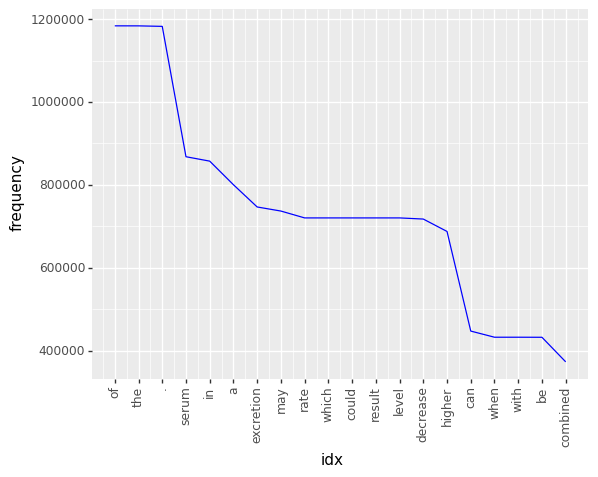

<ggplot: (8773224787541)>

In [0]:
# plot the frequency distribution of the top 20 tokens
import plotnine as p9
# Frequency plot of tokens (the x-axis is the words and the y-axis is the frequency). 
#We show the top 30 words only
K = 20
#dataframe of K most common words (K=30)
thirty_most_frequent_words = pd.DataFrame(fdist.most_common(K),columns=['word','frequency'])
#add index to dataframe
thirty_most_frequent_words['idx'] = list(thirty_most_frequent_words.index)
#plot via ggplot
p9.ggplot(thirty_most_frequent_words) + p9.geom_line(p9.aes(x="idx",y="frequency",group=1),color='blue') + p9.scale_x_continuous(breaks=thirty_most_frequent_words['idx'],labels=thirty_most_frequent_words['word']) + p9.theme(axis_text_x=p9.element_text(angle=90))

Remove the stop words. what si the size of the vocabulary befroe and after removing the stop words.

In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tokens_withno_stopwords = []
for w in final_tokens: 
    if w not in stop_words: 
        tokens_withno_stopwords.append(w)   

print (f"The number of tokens is {len(final_tokens)} ; BEFORE stop words removel")            
print (f"The number of tokens is {len(tokens_withno_stopwords)} ; AFTER stop words removel")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
The number of tokens is 19668419 ; BEFORE stop words removel
The number of tokens is 12558717 ; AFTER stop words removel


compute the frequency distribution after you removed the stop words. Then plot the freq. dist. graph for the top 20 words and compare both graphs

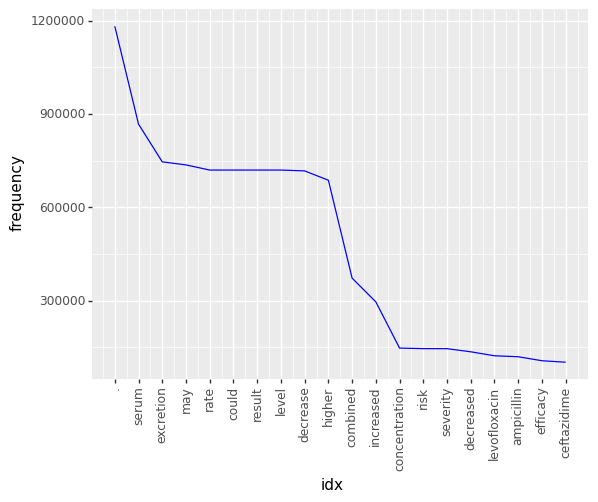

<ggplot: (-9223363263631601008)>

In [0]:
fdist = FreqDist(tokens_withno_stopwords)
fdist.most_common(10)
# Frequency plot of tokens (the x-axis is the words and the y-axis is the frequency). 
#We show the top 30 words only
K = 20
#dataframe of K most common words (K=30)
thirty_most_frequent_words = pd.DataFrame(fdist.most_common(K),columns=['word','frequency'])
#add index to dataframe
thirty_most_frequent_words['idx'] = list(thirty_most_frequent_words.index)
#plot via ggplot
p9.ggplot(thirty_most_frequent_words) + p9.geom_line(p9.aes(x="idx",y="frequency",group=1),color='blue') + p9.scale_x_continuous(breaks=thirty_most_frequent_words['idx'],labels=thirty_most_frequent_words['word']) + p9.theme(axis_text_x=p9.element_text(angle=90))

print 10 rows that have the word "disoproxil" in their context using the concordence method 

In [0]:
final_tokens.concordance('disoproxil',lines=5,width=80)

Displaying 5 of 1240 matches:
n a higher serum level . tenofovir disoproxil may decrease the excretion rate of
ephrotoxic activities of tenofovir disoproxil . the serum concentration of genta
n a higher serum level . tenofovir disoproxil may decrease the excretion rate of
n a higher serum level . tenofovir disoproxil may decrease the excretion rate of
n a higher serum level . tenofovir disoproxil may decrease the excretion rate of


Apply Part of speech tagging to the tokens of the sentence "sent"  (which you defined earlier by selecting the tenth sentence from the 100th document). First print the sentence to make sure it is a valid variable, toknize it, apply POS, then print the items and their POS.

In [0]:
#download related files
nltk.download('averaged_perceptron_tagger')

#tokenize the sentence ....
tokens = nltk.word_tokenize(sent)

#apply nltk.pos_tag()
pos_tokens = nltk.pos_tag(tokens)

#print the tagged tokens
for item in pos_tokens:
    print (item)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
('The', 'DT')
('therapeutic', 'JJ')
('efficacy', 'NN')
('of', 'IN')
('Megestrol', 'NNP')
('acetate', 'NN')
('can', 'MD')
('be', 'VB')
('decreased', 'VBN')
('when', 'WRB')
('used', 'VBN')
('in', 'IN')
('combination', 'NN')
('with', 'IN')
('Phenoxymethylpenicillin', 'NNP')
('.', '.')


### 6. **Named Entity Recognition (NER)**

Classify the tagged tokens/entities based on their categories (person names, organizations, locations, medical codes, time expressions) using "maxent_ne_chunker". Then print the entities.

note: the input to the maxent_ne_chunker is the tagged tokens with their part of speech

In [0]:
#download related files (maxent_ne_chunker and words)
nltk.download('maxent_ne_chunker')
nltk.download('words')

#use the nltk.ne_chunck module
chunked_sentence = nltk.ne_chunk(pos_tokens)
print (chunked_sentence)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
(S
  The/DT
  therapeutic/JJ
  efficacy/NN
  of/IN
  (GPE Megestrol/NNP)
  acetate/NN
  can/MD
  be/VB
  decreased/VBN
  when/WRB
  used/VBN
  in/IN
  combination/NN
  with/IN
  (PERSON Phenoxymethylpenicillin/NNP)
  ./.)


Does the output include any named entity? which category does it belong to?






# **Mining text data**



Generate a binary class using the "ab_class" column such that patients with Sepsis are the true class and patients without it are the negative class. Print the Calss variable


---



In [0]:
# greate a new variable Class that has the values (True, False)
#hint . use the .str.contains method
Class = Edata['ab_class'].str.contains('Sepsis')
print (Class.head(10))

#count how many in each class using .value_counts()
print (Class.value_counts())


0    False
1     True
2    False
3     True
4    False
5    False
6     True
7    False
8     True
9    False
Name: ab_class, dtype: bool
True     459
False    456
Name: ab_class, dtype: int64


replace the boolean values with integer such that True =1 and False=0

In [0]:
#use .replace method
import numpy as np
Y= Class.replace(True,1)
Y=  Y.astype(int)
print (Y)

0      0
1      1
2      0
3      1
4      0
      ..
910    0
911    0
912    0
913    0
914    1
Name: ab_class, Length: 915, dtype: int64


Display the first 5 documents in your "text" variable (that holds all the documents!)

In [0]:
print (text.head(5))

0    Leuprolide may decrease the excretion rate of ...
1    Gentamicin may decrease the excretion rate of ...
2    The risk or severity of QTc prolongation can b...
3    Leuprolide may decrease the excretion rate of ...
4    Leuprolide may decrease the excretion rate of ...
Name: ab_interactions, dtype: object


**Feature extraction using CountVectorizer**

-import the CounterVectorizer from sklearn.feature_extraction.text module. 

-define a new variable tf_vectorizer and set the parameters of the CounterVectorizer such that:  max features =40, ngram_range =(1,3) , stop_words ='english'

-apply the model to the "text" data


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# define the model by setting the parameters to desired values
tf_vectorizer = CountVectorizer(max_features=30,
                                ngram_range=(1, 3), 
                                stop_words='english' )

# apply the vectorizer to the "text" data
tf = tf_vectorizer.fit_transform(text)

#print the features
tf_vectorizer.get_feature_names()

['ampicillin',
 'ceftazidime',
 'ciprofloxacin',
 'combined',
 'concentration',
 'decrease',
 'decrease excretion',
 'decrease excretion rate',
 'decreased',
 'decreased combined',
 'efficacy',
 'excretion',
 'excretion rate',
 'higher',
 'higher serum',
 'higher serum level',
 'increased',
 'increased combined',
 'level',
 'levofloxacin',
 'rate',
 'result',
 'result higher',
 'result higher serum',
 'risk',
 'risk severity',
 'serum',
 'serum concentration',
 'serum level',
 'severity']

print the matrix representation of the data using **dataFrame**. The purpose here is to better visualize the data but does not affect classification

In [0]:
#transform the vectorizeroutput into a dense representation
pd.DataFrame(tf.todense(),columns=tf_vectorizer.get_feature_names())

,ampicillin,ceftazidime,ciprofloxacin,combined,concentration,decrease,decrease excretion,decrease excretion rate,decreased,decreased combined,efficacy,excretion,excretion rate,higher,higher serum,higher serum level,increased,increased combined,level,levofloxacin,rate,result,result higher,result higher serum,risk,risk severity,serum,serum concentration,serum level,severity
0,2,2,1,59,0,673,673,673,6,0,62,713,713,673,673,673,75,0,713,2,713,713,673,673,59,59,713,0,713,59
1,2,2,1,269,42,511,511,511,72,49,41,527,511,511,511,511,238,9,511,2,511,511,511,511,211,211,553,42,511,211
2,4,4,2,1748,940,1312,972,972,488,480,364,1100,1032,972,972,972,1394,766,1032,3092,1032,1032,972,972,502,502,1972,940,1032,502
3,2,2,1,42,39,657,657,657,65,20,102,699,697,657,657,657,39,22,697,2,697,697,657,657,0,0,736,39,697,0
4,2,2,1,622,502,691,543,543,261,219,166,619,575,543,543,543,421,367,575,2,575,575,543,543,36,36,1077,502,575,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,2,2,1,835,286,496,496,496,221,217,32,525,524,496,496,496,618,307,524,2,524,524,496,496,311,311,810,286,524,311
911,4,4,2,1748,940,1312,972,972,488,480,364,1100,1032,972,972,972,1394,766,1032,3092,1032,1032,972,972,502,502,1972,940,1032,502
912,0,0,1,519,12,4,0,0,258,255,23,0,0,0,0,0,282,191,0,2,0,0,0,0,73,73,12,12,0,73
913,0,0,1,904,350,21,21,21,198,190,10,50,23,21,21,21,715,390,23,2,23,23,21,21,324,324,373,350,23,324


Do you see any 3-grams? 

**Classification**

Calssify patients using theur text data. Split the data into train and test, use SVM as classifier, then report accuracy

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split

# assuming you learned this in the machine learning module
#split the data into 2/3 training and 1/3 test
X_train, X_test, y_train, y_test = train_test_split(tf, Y, test_size=0.30, random_state=42)
#define classifier
clf = SVC()
#train model on training data
model = clf.fit(X_train, y_train)
#apply model to test data
predicted = model.predict(X_test)  
#compute accuracy  
acc =  accuracy_score (predicted,y_test)
print(f'Accuracy of the classification model is {acc}')

Accuracy of the classification model is 0.9345454545454546


###Why is text mining important?

We obtained 90% accuracy when we used (1,2)-grams as features. Do you observe better accuracy here as a result of adding 3-grams to the fearue set? 

The answer is **YES**. This is basically the goal of doing NLP and Text mining. if you have time, play with the other parameters; increase max-features, use 4-grams...and see how it affects accuracy!